<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd

In [2]:
#Importation de la librairie plotly express
import plotly.express as px

In [3]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium
#Instruction permettant d'afficher toutes les colonnes d'un dataframe
pd.set_option('display.max_columns', None)
#Ne pas afficher les alertes Jupyter
import warnings
warnings.simplefilter("ignore")

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [4]:
#Importation du fichier web.xlsx
df_web = pd.read_excel("web.xlsx")
#Importation du fichier erp.xlsx
df_erp = pd.read_excel("erp.xlsx")
#importation du fichier liaison.xlsx
df_liaison = pd.read_excel("liaison.xlsx")

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [5]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [6]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   purchase_price  825 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 38.8+ KB


In [7]:
#Afficher les 5 premières lignes de la table
df_erp.head(5)

product_id  onsale_web  price  stock_quantity stock_status  purchase_price
0        3847           1   24.2              16      instock           12.88
1        3849           1   34.3              10      instock           17.54
2        3850           1   20.8               0   outofstock           10.64
3        4032           1   14.1              26      instock            6.92
4        4039           1   46.0               3   outofstock           23.77

In [8]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
print("Absence de doublons dans la table: {}".format(df_erp["product_id"].drop_duplicates().size == df_erp.shape[0]))

Absence de doublons dans la table: True


In [9]:
#Afficher les valeurs distinctes de la colonne stock_status
df_erp["stock_status"].unique()
#À quelle(s) autre(s) colonne(s) sont-elles liées ?
#stock_quantity

array(['instock', 'outofstock'], dtype=object)

In [10]:
#Création d'une colonne "stock_status_2
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"
df_erp["stock_status_2"] = df_erp["stock_quantity"].apply(lambda x: "instock" if x > 0 else "outofstock" )
df_erp

product_id  onsale_web  price  stock_quantity stock_status  \
0          3847           1   24.2              16      instock   
1          3849           1   34.3              10      instock   
2          3850           1   20.8               0   outofstock   
3          4032           1   14.1              26      instock   
4          4039           1   46.0               3   outofstock   
..          ...         ...    ...             ...          ...   
820        7203           0   45.0              30      instock   
821        7204           0   45.0               9      instock   
822        7247           1   54.8               6      instock   
823        7329           0   26.5              14      instock   
824        7338           1   16.3              40      instock   

     purchase_price stock_status_2  
0             12.88        instock  
1             17.54        instock  
2             10.64     outofstock  
3              6.92        instock  
4             23.77        instock  
..              ...            ...  
820           23.48        instock  
821           24.18        instock  
822           27.18        instock  
823           13.42        instock  
824            8.00        instock  

[825 rows x 7 columns]

In [11]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

0       True
1       True
2       True
3       True
4      False
       ...  
820     True
821     True
822     True
823     True
824     True
Length: 825, dtype: bool

In [12]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset
(df_erp["stock_status"] == df_erp["stock_status_2"]).sum()

823

In [13]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3
df_erp[df_erp["stock_status"] != df_erp["stock_status_2"]]

product_id  onsale_web  price  stock_quantity stock_status  \
4          4039           1   46.0               3   outofstock   
398        4885           1   18.7               0      instock   

     purchase_price stock_status_2  
4             23.77        instock  
398            9.66     outofstock

In [14]:
#Corriger la ou les données incohérentes
df_erp.loc[df_erp['product_id'] == 4039, 'stock_status'] = 'instock'
df_erp.loc[df_erp['product_id'] == 4885, 'stock_status'] = 'outofstock'

#Verification en utilisant le même code que plus haut pour afficher les problemes
df_erp[df_erp["stock_status"] != df_erp["stock_status_2"]]

Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, purchase_price, stock_status_2]
Index: []

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [15]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
#Afficher le ou les prix non renseignés dans la colonne "price"
print("Nombres d'article avec un prix non renseignés: {}".format(df_erp["price"].isnull().sum())) #Saisir l'instruction manquante dans la fonction format
#Afficher le prix minimum de la colonne "price"
print("Le prix le plus bas: {}".format(df_erp["price"].min()))
#Afficher le prix maximum de la colonne "price"
print("Le prix le plus haut: {}".format(df_erp["price"].max()))
#Affichier les prix inférieurs à 0 (qu'est ce qu'il faut en faire ?)
df_erp[df_erp['price'] < 0]
#On pourrait les supprimer car ces données ne sont pas normales, et pourraient gêner l'analyse. Et en informer le service concerné

Nombres d'article avec un prix non renseignés: 0
Le prix le plus bas: -20.0
Le prix le plus haut: 225.0


product_id  onsale_web  price  stock_quantity stock_status  \
151        4233           0  -20.0               0   outofstock   
469        5017           0   -8.0               0   outofstock   
739        6594           0   -9.1              19      instock   

     purchase_price stock_status_2  
151           10.33     outofstock  
469            4.34     outofstock  
739            4.61        instock

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [16]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
print("Le stock le plus bas: {}".format(df_erp["stock_quantity"].min()))
#Afficher la quantité maximum de la colonne "stock_quantity"
print("Le stock le plus haut: {}".format(df_erp["stock_quantity"].max()))
#Affichier les stocks inférieurs à 0 (qu'est ce qu'il faut en faire ?)
df_erp[df_erp['stock_quantity'] < 0]
#On pourrait les supprimer car ces données ne sont pas normales, et pourraient gêner l'analyse. Et en informer le service concerné

Le stock le plus bas: -10
Le stock le plus haut: 145


product_id  onsale_web  price  stock_quantity stock_status  \
449        4973           0   10.0             -10   outofstock   
573        5700           1   44.5              -1   outofstock   

     purchase_price stock_status_2  
449            4.96     outofstock  
573           22.30     outofstock

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [17]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?
df_erp['onsale_web'].unique()
#0 signifie que l'article n'est pas en vente sur internet, 1 signifie que l'article est en vente sur internet

array([1, 0], dtype=int64)

In [18]:
#Quelles sont les colonnes à conserver selon vous?
#product_id, onsale_web, price, stock_quantity

In [19]:
#Supprimer la colonne comportant le libellé "stock_status_2" car elle est redondante 
#avec la colonne "stock_status".
df_erp.drop("stock_status_2", axis=1, inplace=True)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [20]:
######################
##   prix d'achat   ##
######################

#Vérification de la colonne purchase_price : 
#Afficher le ou les prix non renseignés dans la colonne "purchase_price"
print("Nombres d'article avec un prix non renseignés: {}".format(df_erp["purchase_price"].isnull().sum()))
#Afficher le prix minimum de la colonne "purchase_price"
print("Le prix d'achat le plus bas: {}".format(df_erp["purchase_price"].min()))
#Afficher le prix maximum de la colonne "purchase_price"
print("Le prix d'achat le plus haut: {}".format(df_erp["purchase_price"].max()))

Nombres d'article avec un prix non renseignés: 0
Le prix d'achat le plus bas: 2.74
Le prix d'achat le plus haut: 137.81


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>
 

In [21]:
#Dimension du dataset
#Nombre d'observations
print("Le tableau comporte {} observation(s) ou article(s)".format(df_web.shape[0]))
#Nombre de caractéristiques
print("Le tableau comporte {} colonne(s)".format(df_web.shape[1]))

Le tableau comporte 1513 observation(s) ou article(s)
Le tableau comporte 29 colonne(s)


In [22]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  product_type           1429 non-null   object        
 13  pos

In [23]:
#Selon vous, quelles sont les colonnes à conserver ?
#Les colonnes qui ne sont pas vides

In [24]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
liste_des_colonnes_a_supprimer=["tax_class", "post_content", "post_password", "post_content_filtered"]
for col in liste_des_colonnes_a_supprimer:
    df_web.drop(col, axis=1, inplace=True)

In [25]:
#Visualisation des valeurs de la colonne sku
df_web["sku"].unique()
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
#'13127-1', 'bon-cadeau-25-euros', 'nan'

array([11862, 16057, 14692, 16295, 15328, 15471, 16515, 16246, nan, 13572,
       16513, 16585, 16269, 15526, 12869, 15575, 11586, 14338, 15425,
       16560, 15361, 13809, 11587, 15022, 14323, 16342, 16029, 15475,
       13754, 14680, 15875, 9636, 13849, 13662, 16564, 13557, 15429,
       14712, 15032, 15481, 15448, 16580, 15441, 804, 15300, 13958, 16071,
       15678, 13895, 15711, 12882, 16053, 13766, 16247, 12640, 15292,
       15476, 15670, 16189, 16038, 14864, 16044, 15324, 15531, 15953,
       15413, 15733, 14366, 15895, 15892, 16472, 15185, 16010, 15793,
       15849, 12315, 15741, 15934, 15148, 15781, 15659, 15106, 15490,
       14507, 14149, 16307, 13736, 14090, 16037, 15758, 14661, 12587,
       15337, 15489, 15201, 16305, 16131, 13435, 15747, 12203, 14509,
       14768, 16262, 14561, 16505, 15717, 16129, 13460, 15871, 15940,
       11602, 13127, 13520, 15480, 13032, 15436, 15269, 15910, 19821,
       16263, 15138, 15146, 15126, 15482, 16186, 13905, 16540, 15856,
       1567

In [26]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?
df_web[df_web["sku"]=="13127-1"]

sku  virtual  downloadable  rating_count  average_rating  \
272   13127-1        0             0             0             0.0   
1117  13127-1        0             0             0             0.0   

      total_sales tax_status  post_author           post_date  \
272           4.0    taxable          2.0 2020-06-09 15:42:04   
1117          4.0        NaN          2.0 2020-06-09 15:42:04   

           post_date_gmt product_type  \
272  2020-06-09 13:42:04          Vin   
1117 2020-06-09 13:42:04          Vin   

                                        post_title  \
272   Clos du Mont-Olivet Châteauneuf-du-Pape 2007   
1117  Clos du Mont-Olivet Châteauneuf-du-Pape 2007   

                                           post_excerpt post_status  \
272   Nez gracieux, très élégant avec une touche flo...     publish   
1117                                                NaN     publish   

     comment_status ping_status  \
272          closed      closed   
1117         closed      closed   

                                           post_name       post_modified  \
272   clos-du-mont-olivet-chateauneuf-du-pape-2007-2 2020-07-20 17:09:06   
1117  clos-du-mont-olivet-chateauneuf-du-pape-2007-2 2020-07-20 17:09:06   

       post_modified_gmt  post_parent  \
272  2020-07-20 15:09:06          0.0   
1117 2020-07-20 15:09:06          0.0   

                                                   guid  menu_order  \
272   https://www.bottle-neck.fr/?post_type=product&...         0.0   
1117  https://www.bottle-neck.fr/wp-content/uploads/...         0.0   

       post_type post_mime_type  comment_count  
272      product            NaN            0.0  
1117  attachment     image/jpeg            0.0

In [27]:
df_web = df_web.drop(index=1117)

In [28]:
df_web[df_web["sku"]=="bon-cadeau-25-euros"]

sku  virtual  downloadable  rating_count  \
842   bon-cadeau-25-euros        0             0             0   
1387  bon-cadeau-25-euros        0             0             0   

      average_rating  total_sales tax_status  post_author           post_date  \
842              0.0          7.0        NaN          1.0 2018-06-01 13:53:46   
1387             0.0          7.0    taxable          1.0 2018-06-01 13:53:46   

           post_date_gmt product_type         post_title  \
842  2018-06-01 11:53:46        Autre  Bon cadeau de 25€   
1387 2018-06-01 11:53:46          NaN  Bon cadeau de 25€   

                                           post_excerpt post_status  \
842                                                 NaN     publish   
1387  <span style="color: #a85253;"><strong>Parlons ...     publish   

     comment_status ping_status               post_name       post_modified  \
842          closed      closed  bon-cadeau-de-25-euros 2018-06-01 14:13:57   
1387         closed      closed  bon-cadeau-de-25-euros 2018-06-01 14:13:57   

       post_modified_gmt  post_parent  \
842  2018-06-01 12:13:57          0.0   
1387 2018-06-01 12:13:57          0.0   

                                                   guid  menu_order  \
842   https://www.bottle-neck.fr/wp-content/uploads/...         0.0   
1387  https://www.bottle-neck.fr/?post_type=product&...         0.0   

       post_type post_mime_type  comment_count  
842   attachment     image/jpeg            0.0  
1387     product            NaN            0.0

In [29]:
df_web = df_web.drop(index=842)

In [30]:
df_web[df_web["sku"].isnull()]

sku  virtual  downloadable  rating_count  average_rating  total_sales  \
8     NaN        0             0             0             NaN          NaN   
20    NaN        0             0             0             NaN          NaN   
30    NaN        0             0             0             NaN          NaN   
37    NaN        0             0             0             NaN          NaN   
41    NaN        0             0             0             NaN          NaN   
...   ...      ...           ...           ...             ...          ...   
1384  NaN        0             0             0             NaN          NaN   
1429  NaN        0             0             0             NaN          NaN   
1432  NaN        0             0             0             NaN          NaN   
1445  NaN        0             0             0             NaN          NaN   
1457  NaN        0             0             0             NaN          NaN   

     tax_status  post_author post_date post_date_gmt product_type post_title  \
8           NaN          NaN       NaT           NaT          NaN        NaN   
20          NaN          NaN       NaT           NaT          NaN        NaN   
30          NaN          NaN       NaT           NaT          NaN        NaN   
37          NaN          NaN       NaT           NaT          NaN        NaN   
41          NaN          NaN       NaT           NaT          NaN        NaN   
...         ...          ...       ...           ...          ...        ...   
1384        NaN          NaN       NaT           NaT          NaN        NaN   
1429        NaN          NaN       NaT           NaT          NaN        NaN   
1432        NaN          NaN       NaT           NaT          NaN        NaN   
1445        NaN          NaN       NaT           NaT          NaN        NaN   
1457        NaN          NaN       NaT           NaT          NaN        NaN   

     post_excerpt post_status comment_status ping_status post_name  \
8             NaN         NaN            NaN         NaN       NaN   
20            NaN         NaN            NaN         NaN       NaN   
30            NaN         NaN            NaN         NaN       NaN   
37            NaN         NaN            NaN         NaN       NaN   
41            NaN         NaN            NaN         NaN       NaN   
...           ...         ...            ...         ...       ...   
1384          NaN         NaN            NaN         NaN       NaN   
1429          NaN         NaN            NaN         NaN       NaN   
1432          NaN         NaN            NaN         NaN       NaN   
1445          NaN         NaN            NaN         NaN       NaN   
1457          NaN         NaN            NaN         NaN       NaN   

     post_modified post_modified_gmt  post_parent guid  menu_order post_type  \
8              NaT               NaT          NaN  NaN         NaN       NaN   
20             NaT               NaT          NaN  NaN         NaN       NaN   
30             NaT               NaT          NaN  NaN         NaN       NaN   
37             NaT               NaT          NaN  NaN         NaN       NaN   
41             NaT               NaT          NaN  NaN         NaN       NaN   
...            ...               ...          ...  ...         ...       ...   
1384           NaT               NaT          NaN  NaN         NaN       NaN   
1429           NaT               NaT          NaN  NaN         NaN       NaN   
1432           NaT               NaT          NaN  NaN         NaN       NaN   
1445           NaT               NaT          NaN  NaN         NaN       NaN   
1457           NaT               NaT          NaN  NaN         NaN       NaN   

     post_mime_type  comment_count  
8               NaN            NaN  
20              NaN            NaN  
30              NaN            NaN  
37              NaN            NaN  
41              NaN            NaN  
...             ...            ...  
1384            NaN            NaN 

In [31]:
#Identifier les lignes sans code articles
df_web[df_web["sku"].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 8 to 1457
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                0 non-null      object        
 1   virtual            85 non-null     int64         
 2   downloadable       85 non-null     int64         
 3   rating_count       85 non-null     int64         
 4   average_rating     2 non-null      float64       
 5   total_sales        2 non-null      float64       
 6   tax_status         2 non-null      object        
 7   post_author        2 non-null      float64       
 8   post_date          2 non-null      datetime64[ns]
 9   post_date_gmt      2 non-null      datetime64[ns]
 10  product_type       2 non-null      object        
 11  post_title         2 non-null      object        
 12  post_excerpt       2 non-null      object        
 13  post_status        2 non-null      object        
 14  comment_st

In [32]:
#Pour les codes articles identifiés, réalisé une analyse et définissez l'action à entreprendre
df_web[df_web["sku"].isnull()][df_web["average_rating"].notnull()]

sku  virtual  downloadable  rating_count  average_rating  total_sales  \
1084  NaN        0             0             0             0.0        -56.0   
1087  NaN        0             0             0             0.0        -17.0   

     tax_status  post_author           post_date       post_date_gmt  \
1084    taxable          2.0 2018-08-08 11:23:43 2018-08-08 09:23:43   
1087    taxable          2.0 2018-07-31 12:07:23 2018-07-31 10:07:23   

     product_type                                       post_title  \
1084          Vin  Pierre Jean Villa Condrieu Jardin Suspendu 2018   
1087          Vin       Pierre Jean Villa Côte Rôtie Fongeant 2017   

                                           post_excerpt post_status  \
1084  <span id="u1194-83">Le nez séduit par ses parf...     publish   
1087  Fongeant 2017 explose sur un fruit brillant, p...     publish   

     comment_status ping_status                                   post_name  \
1084         closed      closed    pierre-jean-villa-condrieu-suspendu-2018   
1087         closed      closed  pierre-jean-villa-cote-rotie-fongeant-2017   

           post_modified   post_modified_gmt  post_parent  \
1084 2019-11-02 13:24:01 2019-11-02 12:24:01          0.0   
1087 2019-11-02 13:24:15 2019-11-02 12:24:15          0.0   

                                                   guid  menu_order post_type  \
1084  https://www.bottle-neck.fr/?post_type=product&...         0.0   product   
1087  https://www.bottle-neck.fr/?post_type=product&...         0.0   product   

     post_mime_type  comment_count  
1084            NaN            0.0  
1087            NaN            0.0

In [33]:
#On les conserve et leur attribut un code
df_web.loc[1084,"sku"]="article_inconnu_0"
df_web.loc[1087,"sku"]="article_inconnu_1"

In [34]:
#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?
df_web["sku"].unique().size == df_web.shape[0]

False

In [35]:
#Les lignes sans code article semble être toutes non renseignés
#Pour s'en assurer réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
df_sans_code = df_web[df_web["sku"].isnull()]
#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes
df_sans_code.info()
#3 - Que constatez-vous?
#les lignes sans code article ne sont effectivement pas renseignées

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 8 to 1457
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                0 non-null      object        
 1   virtual            83 non-null     int64         
 2   downloadable       83 non-null     int64         
 3   rating_count       83 non-null     int64         
 4   average_rating     0 non-null      float64       
 5   total_sales        0 non-null      float64       
 6   tax_status         0 non-null      object        
 7   post_author        0 non-null      float64       
 8   post_date          0 non-null      datetime64[ns]
 9   post_date_gmt      0 non-null      datetime64[ns]
 10  product_type       0 non-null      object        
 11  post_title         0 non-null      object        
 12  post_excerpt       0 non-null      object        
 13  post_status        0 non-null      object        
 14  comment_st

In [36]:
df_web = df_web.dropna(subset=['sku'])

In [37]:
df_web = df_web.drop_duplicates(subset=['sku'], keep='first')

In [38]:
df_web["sku"].unique().size == df_web.shape[0]

True

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [39]:
#Dimension du dataset
#Nombre d'observations
print("Le tableau comporte {} observation(s) ou article(s)".format(df_liaison.shape[0]))

#Nombre de caractéristiques
print("Le tableau comporte {} colonne(s)".format(df_liaison.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 2 colonne(s)


In [40]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      734 non-null    object
 1   product_id  825 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [41]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?
df_liaison["product_id"].unique().size == df_liaison.shape[0]

True

In [42]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
df_liaison["id_web"].unique().size == df_liaison.shape[0]

False

In [43]:
#Avons-nous des articles sans correspondances?
sans_correspondances = df_liaison["product_id"].nunique() - df_liaison["id_web"].nunique()

if (sans_correspondances) == 0:
    print ("Tous les articles ont des correspondances.")
else:
    print ("Il y a des articles sans correspondaces.")
print (sans_correspondances)

Il y a des articles sans correspondaces.
91


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [44]:
#Fusion des fichiers df_erp et df_liaison
df_merge = pd.merge(df_erp, df_liaison,  how="outer" ,on="product_id", indicator=True)
df_merge

product_id  onsale_web  price  stock_quantity stock_status  \
0          3847           1   24.2              16      instock   
1          3849           1   34.3              10      instock   
2          3850           1   20.8               0   outofstock   
3          4032           1   14.1              26      instock   
4          4039           1   46.0               3      instock   
..          ...         ...    ...             ...          ...   
820        7203           0   45.0              30      instock   
821        7204           0   45.0               9      instock   
822        7247           1   54.8               6      instock   
823        7329           0   26.5              14      instock   
824        7338           1   16.3              40      instock   

     purchase_price   id_web _merge  
0             12.88    15298   both  
1             17.54    15296   both  
2             10.64    15300   both  
3              6.92    19814   both  
4             23.77    19815   both  
..              ...      ...    ...  
820           23.48      NaN   both  
821           24.18      NaN   both  
822           27.18  13127-1   both  
823           13.42  14680-1   both  
824            8.00    16230   both  

[825 rows x 8 columns]

In [45]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?
df_merge[df_merge["_merge"] != 'both']

Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, purchase_price, id_web, _merge]
Index: []

In [46]:
#Supression de la colonne "_merge"
df_merge.drop("_merge", axis=1, inplace=True)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [47]:
#Fusionnez les datasets df_merge et df_web
liste_colonnes_conserves = ["sku", "total_sales", "post_title", "post_excerpt", "post_name", "product_type"]
df_merge = pd.merge(df_merge, df_web[liste_colonnes_conserves], left_on="id_web", right_on="sku", how="outer", indicator=True)
df_merge

product_id  onsale_web  price  stock_quantity stock_status  \
0        3847.0         1.0   24.2            16.0      instock   
1        3849.0         1.0   34.3            10.0      instock   
2        3850.0         1.0   20.8             0.0   outofstock   
3        4032.0         1.0   14.1            26.0      instock   
4        4039.0         1.0   46.0             3.0      instock   
..          ...         ...    ...             ...          ...   
822      7247.0         1.0   54.8             6.0      instock   
823      7329.0         0.0   26.5            14.0      instock   
824      7338.0         1.0   16.3            40.0      instock   
825         NaN         NaN    NaN             NaN          NaN   
826         NaN         NaN    NaN             NaN          NaN   

     purchase_price   id_web                sku  total_sales  \
0             12.88    15298              15298          6.0   
1             17.54    15296              15296          9.0   
2             10.64    15300              15300          0.0   
3              6.92    19814              19814         12.0   
4             23.77    19815              19815          3.0   
..              ...      ...                ...          ...   
822           27.18  13127-1            13127-1          4.0   
823           13.42  14680-1                NaN          NaN   
824            8.00    16230              16230         13.0   
825             NaN      NaN  article_inconnu_0        -56.0   
826             NaN      NaN  article_inconnu_1        -17.0   

                                            post_title  \
0          Pierre Jean Villa Saint-Joseph Préface 2018   
1      Pierre Jean Villa Saint-Joseph Rouge Tildé 2017   
2    Pierre Jean Villa Crozes-Hermitage Accroche Co...   
3    Pierre Jean Villa IGP Collines Rhodaniennes Ga...   
4            Pierre Jean Villa Côte Rôtie Carmina 2017   
..                                                 ...   
822       Clos du Mont-Olivet Châteauneuf-du-Pape 2007   
823                                                NaN   
824  Domaine Saint-Nicolas Vin de France Blanc Les ...   
825    Pierre Jean Villa Condrieu Jardin Suspendu 2018   
826         Pierre Jean Villa Côte Rôtie Fongeant 2017   

                                          post_excerpt  \
0    Il exhale un nez subtil, racé avec du poivre f...   
1    Les vieilles vignes lui apportent une rare pro...   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
822  Nez gracieux, très élégant avec une touche flo...   
823                                                NaN   
824                                                NaN   
825  <span id="u1194-83">Le nez séduit par ses parf...   
826  Fongeant 2017 explose sur un fruit brillant, p...   

                                             post_name product_type  \
0          pierre-jean-villa-saint-joseph-preface-2018          Vin   
1            pierre-jean-villa-saint-joseph-tilde-2017          Vin   
2    pierre-jean-villa-croze-hermitage-accroche-coe...          Vin   
3                    pierre-jean-villa-igp-gamine-2018          Vin   
4            pierre-jean-villa-cote-rotie-carmina-2017          Vin   
..                                                 ...          ...   
822     clos-du-mont-olivet-chateauneuf-du-pape-2007-2          Vin   
823                                                NaN          NaN   
824  domaine-saint-nicolas-fiefs-vendeens-blanc-les...          Vin   
825           pierre-jean-villa-condrieu-suspendu-2018          Vin   
826         pierre-jean-villa-cote-rotie-fongeant-2017          Vin   

         _merge  
0          both  
1          both  
2          both  
3          both  
4          both  
..          ...  
822        both  
823   left_only  
824        both  
825 

In [48]:
#Avons-nous des lignes sans correspondances?
df_sans_correspondance = df_merge[df_merge["_merge"] != "both"]
df_sans_correspondance.shape

(113, 14)

In [49]:
df_sans_correspondance

product_id  onsale_web  price  stock_quantity stock_status  \
19       4055.0         0.0   86.1             0.0   outofstock   
20       4090.0         0.0   73.0             0.0   outofstock   
21       4092.0         0.0   47.0             0.0   outofstock   
22       4195.0         0.0   14.1             0.0   outofstock   
23       4209.0         0.0   73.5             0.0   outofstock   
..          ...         ...    ...             ...          ...   
720      5957.0         0.0   39.0             0.0   outofstock   
743      6100.0         0.0   12.9             0.0   outofstock   
823      7329.0         0.0   26.5            14.0      instock   
825         NaN         NaN    NaN             NaN          NaN   
826         NaN         NaN    NaN             NaN          NaN   

     purchase_price   id_web                sku  total_sales  \
19            37.88      NaN                NaN          NaN   
20            33.79      NaN                NaN          NaN   
21            25.25      NaN                NaN          NaN   
22             7.36      NaN                NaN          NaN   
23            33.01      NaN                NaN          NaN   
..              ...      ...                ...          ...   
720           20.75    13577                NaN          NaN   
743            6.47    15529                NaN          NaN   
823           13.42  14680-1                NaN          NaN   
825             NaN      NaN  article_inconnu_0        -56.0   
826             NaN      NaN  article_inconnu_1        -17.0   

                                          post_title  \
19                                               NaN   
20                                               NaN   
21                                               NaN   
22                                               NaN   
23                                               NaN   
..                                               ...   
720                                              NaN   
743                                              NaN   
823                                              NaN   
825  Pierre Jean Villa Condrieu Jardin Suspendu 2018   
826       Pierre Jean Villa Côte Rôtie Fongeant 2017   

                                          post_excerpt  \
19                                                 NaN   
20                                                 NaN   
21                                                 NaN   
22                                                 NaN   
23                                                 NaN   
..                                                 ...   
720                                                NaN   
743                                                NaN   
823                                                NaN   
825  <span id="u1194-83">Le nez séduit par ses parf...   
826  Fongeant 2017 explose sur un fruit brillant, p...   

                                      post_name product_type      _merge  
19                                          NaN          NaN   left_only  
20                                          NaN          NaN   left_only  
21                                          NaN          NaN   left_only  
22                                          NaN          NaN   left_only  
23                                          NaN          NaN   left_only  
..                                          ...          ...         ...  
720                                         NaN          NaN   left_only  
743                                         NaN          NaN   left_only  
823                                         NaN          NaN   left_only  
825    pierre-jean-villa-condrieu-suspendu-2018          Vin  right_only  
826  pierre-jean-villa-cote-rotie-fongeant-2017          Vin  right_only  

[113 rows x 14 columns]

In [50]:
print("Nombre d'articles sans correspondances: {}%".format(round((df_sans_correspondance.shape[0] / df_merge.shape[0]) * 100, 2)))

Nombre d'articles sans correspondances: 13.66%


In [51]:
df_merge.drop("_merge", axis=1, inplace=True)

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

<Axes: >

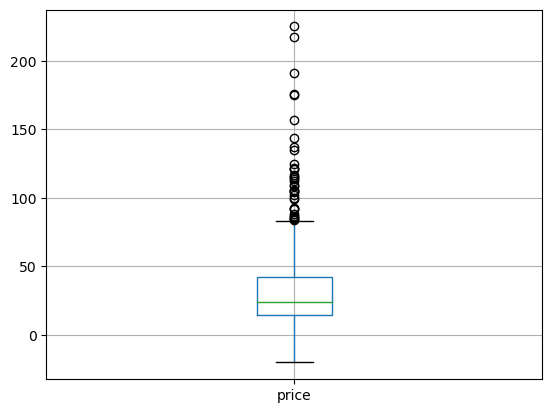

In [52]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
import matplotlib.pyplot as plt
df_merge[["price"]].boxplot()

In [53]:
#Autre méthode avec plotly express
fig = px.box(data_frame=df_merge, y="price", title="Boxplot des prix", )
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [54]:
#Calculer la moyenne du prix
moyenne_prix = df_merge["price"].mean()
print("La moyenne du prix est :", round(moyenne_prix,2))
#Calculer l'écart-type du prix
ecart_type_prix = df_merge["price"].std()
print("L'écart-type du prix est :", round(ecart_type_prix,2))
#Calculer le Z-score
z_score_prix = (df_merge['price'] - moyenne_prix) / ecart_type_prix
z_score_prix = z_score_prix.mean()
print("le Z-score est :", z_score_prix)

La moyenne du prix est : 32.19
L'écart-type du prix est : 26.71
le Z-score est : 1.808654236480255e-16


In [55]:
#Quel est le seuil prix dont z-score est supérieur à 3?
df_outliers = df_merge[df_merge["price"].apply(lambda x: abs(x - moyenne_prix) / ecart_type_prix) > 3]
print("Le seuil prix pour le z-score de 3: ", int(df_outliers["price"].min()))

Le seuil prix pour le z-score de 3:  114


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [56]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
df_merge_price_describe = df_merge[["price"]].describe()
df_merge_price_describe

price
count  825.000000
mean    32.187697
std     26.712077
min    -20.000000
25%     14.500000
50%     24.300000
75%     42.000000
max    225.000000

In [57]:
#Définissez un seuil pour les articles "outliers" en prix
seuil_outliers = df_merge_price_describe.loc['75%']["price"] + (df_merge_price_describe.loc['75%']["price"] - df_merge_price_describe.loc['25%']["price"]) * 1.5
print("Les 'outliers' se situent: {}".format(int(seuil_outliers),2))

Les 'outliers' se situent: 83


In [58]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"
nombre_articles_outliers = df_erp[df_erp["price"] >= seuil_outliers].shape[0]
proportion_articles_outliers = df_erp[df_erp["price"] >= seuil_outliers].shape[0] / df_erp.shape[0]
print(f"Nombre d'articles au dessus du seuil des outliers: {nombre_articles_outliers}")
print("Proportion d'articles au dessus du seuil des outliers: {}%".format(round(proportion_articles_outliers * 100, 0)))

Nombre d'articles au dessus du seuil des outliers: 36
Proportion d'articles au dessus du seuil des outliers: 4.0%


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [59]:
##############################
# Calculer le CA su site web #
##############################

#Créez une colonne calculant le CA par article
df_merge["ca_par_article"] = df_merge['price'] * df_merge['total_sales']
#Calculez la somme de la colonne "ca_par_article"
#Ce résultat correspond au chiffre d'affaire du site web
print("Le chiffre d'affaire est de {} €".format(int(df_merge["ca_par_article"].sum())))

Le chiffre d'affaire est de 153748 €


In [60]:
df_merge.shape

(827, 14)

In [61]:
###############################
# Palmares des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
df_merge.sort_values("ca_par_article", ascending=False, inplace=True)
#Réinitialiser l'index du dataset par un reset_index
df_merge.reset_index(drop=True, inplace=True)
#Afficher les 20 premier articles en CA
df_merge['ca_par_article'].head(20)
#Graphique en barre des 20 premiers articles avec plotly express
px.bar(data_frame=df_merge[:20][::-1], y="post_title", x="ca_par_article", orientation="h", title="Palmares des 20 premiers articles en CA")

In [62]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
total_CA = df_merge['ca_par_article'].sum()
df_merge['part_ca'] = df_merge['ca_par_article'] / total_CA
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merge['ca_cumule'] = df_merge['part_ca'].cumsum()
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
print("Nombre d'articles représentant 80% du CA: {} articles".format(df_merge[df_merge["ca_cumule"] <= 0.8].shape[0]))
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
print("Cela correspond à {}% du catalogue".format(round(df_merge[df_merge["ca_cumule"] <= 0.8].shape[0] / df_merge.shape[0] * 100, 2)))

Nombre d'articles représentant 80% du CA: 420 articles
Cela correspond à 50.79% du catalogue


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [63]:
#####################################
# Palmares des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
df_merge.sort_values(by='total_sales', ascending=False, inplace=True)
#Réinitialiser l'index du dataset par un reset_index
df_merge.reset_index(drop=True, inplace=True)
#Afficher les 20 premier articles en quantité
df_merge['total_sales'].head(20)
#Graphique en barre des 20 premiers articles avec plotly express
px.bar(data_frame=df_merge[:20][::-1], y="post_title", x="total_sales", orientation="h", title="20 premiers articles en quantité")

In [64]:
#############################
# Calculer le 20 / 80 en quantité #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
somme_sales = df_merge['total_sales'].sum()
df_merge['part_sales'] = df_merge['total_sales'] / somme_sales
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merge['sales_cumule'] = df_merge['part_sales'].cumsum()
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
print("Nombre d'articles représentant 80% des ventes en quantité: {} articles".format(df_merge[df_merge["sales_cumule"] <= 0.8].shape[0]))
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
print("Cela correspond à {}% du catalogue".format(round(df_merge[df_merge["sales_cumule"] <= 0.8].shape[0] / df_merge.shape[0] * 100, 2)))

Nombre d'articles représentant 80% des ventes en quantité: 416 articles
Cela correspond à 50.3% du catalogue


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

In [65]:
######################################
# Calcule le nombre de mois de stock #
######################################

#Import de numpy 
import numpy as np
#Création de la colonne Nombre de mois de stock
df_merge["Nombre_mois_stock"] = df_merge["stock_quantity"] / df_merge["total_sales"]
#Remplacement des "inf" par 0
df_merge['Nombre_mois_stock'] = df_merge['Nombre_mois_stock'].replace([np.inf], 0)
#Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset df_merge
df_merge.sort_values('Nombre_mois_stock', ascending=False, inplace=True)
#Graphique en barre du flop 20 des produits qui ont le plus de mois de stock
px.bar(data_frame=df_merge[:20][::-1], y="post_title", x="Nombre_mois_stock", orientation="h", title="Flop 20 des produits avec le plus de mois de stock")

In [66]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros
df_merge["Valorisation_stock_euros"] = df_merge["stock_quantity"] * df_merge["price"]
#Calculer la somme de la colonne "Valorisation_stock_euros"
print("La valorisation de notre stock est de {} €".format(int(df_merge["Valorisation_stock_euros"].sum())))
print("Nous avons {:.1f} mois de stock".format(df_merge["Valorisation_stock_euros"].sum() / df_merge["ca_par_article"].sum()))

La valorisation de notre stock est de 531628 €
Nous avons 3.5 mois de stock


In [67]:
##############################################
# Valorisation du nombre de produit en stock #
##############################################

#Calculer la somme de la colonne stock quantity
print("le nombre de bouteille dans notre stock est de {} pieces".format(int(df_merge["stock_quantity"].sum())))

le nombre de bouteille dans notre stock est de 17811 pieces


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [68]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne prix HT
df_merge["Prix_HT"] = df_merge["price"] / (1+0.20)
#Création de la colonne Taux de marge
df_merge["taux_marge"] = (df_merge["Prix_HT"] - df_merge["purchase_price"]) / df_merge["Prix_HT"]
#Afficher le prix minimum de la colonne "taux_marge"
print("Le taux de marge le plus bas: {}".format(round(df_merge["taux_marge"].min(),2)))
#Afficher le prix maximum de la colonne "taux_marge"
print("Le taux de marge le plus haut: {}".format(round(df_merge["taux_marge"].max(),2)))

Le taux de marge le plus bas: -6.35
Le taux de marge le plus haut: 1.65


In [69]:
#affichage de la ligne avec un taux de marge inférieur à 0
df_merge[df_merge['taux_marge'] < 0]

product_id  onsale_web  price  stock_quantity stock_status  \
696      4355.0         1.0  12.65            97.0      instock   
752      6324.0         0.0  92.00            18.0      instock   
802      7196.0         0.0  31.00            55.0      instock   
811      4864.0         0.0   8.30             0.0   outofstock   

     purchase_price id_web    sku  total_sales  \
696           77.48  12589  12589          0.0   
752           99.00    NaN    NaN          NaN   
802           31.20    NaN    NaN          NaN   
811            9.99  15154    NaN          NaN   

                                         post_title  \
696  Champagne Egly-Ouriet Grand Cru Blanc de Noirs   
752                                             NaN   
802                                             NaN   
811                                             NaN   

                                          post_excerpt  \
696  Le Blanc de Noirs représente le meilleur du sa...   
752                                                NaN   
802                                                NaN   
811                                                NaN   

                                             post_name product_type  \
696  champagne-egly-ouriet-grand-cru-brut-blanc-de-...    Champagne   
752                                                NaN          NaN   
802                                                NaN          NaN   
811                                                NaN          NaN   

     ca_par_article  part_ca  ca_cumule  part_sales  sales_cumule  \
696             0.0      0.0        1.0         0.0       1.01215   
752             NaN      NaN        NaN         NaN           NaN   
802             NaN      NaN        NaN         NaN           NaN   
811             NaN      NaN        NaN         NaN           NaN   

     Nombre_mois_stock  Valorisation_stock_euros    Prix_HT  taux_marge  
696                0.0                   1227.05  10.541667   -6.349881  
752                NaN                   1656.00  76.666667   -0.291304  
802                NaN                   1705.00  25.833333   -0.207742  
811                NaN                      0.00   6.916667   -0.444337

In [70]:
#création d'un dataframe avec les taux positifs
df_tx_positif = df_merge[df_merge['taux_marge'] >= 0]
#Afficher le prix minimum de la colonne "taux_marge"
print("Le taux de marge le plus bas: {}".format(round(df_tx_positif["taux_marge"].min(),2)))
#Afficher le prix maximum de la colonne "taux_marge"
print("Le taux de marge le plus haut: {}".format(round(df_tx_positif["taux_marge"].max(),2)))

Le taux de marge le plus bas: 0.23
Le taux de marge le plus haut: 1.65


In [71]:
#création d'un dataframe avec le taux de marge moyen par type de produit
df_taux_marge = df_tx_positif.groupby('product_type')['taux_marge'].mean().reset_index()
#Affichage dans un graphique du taux de marge par type de produit
df_taux_marge.sort_values("taux_marge", ascending=True, inplace=True)
px.bar(df_taux_marge, y="taux_marge", x="product_type", orientation="v", title="Taux de marge par type de produit")

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des correlations entre les variables stock, sales et price</h3>
</div>

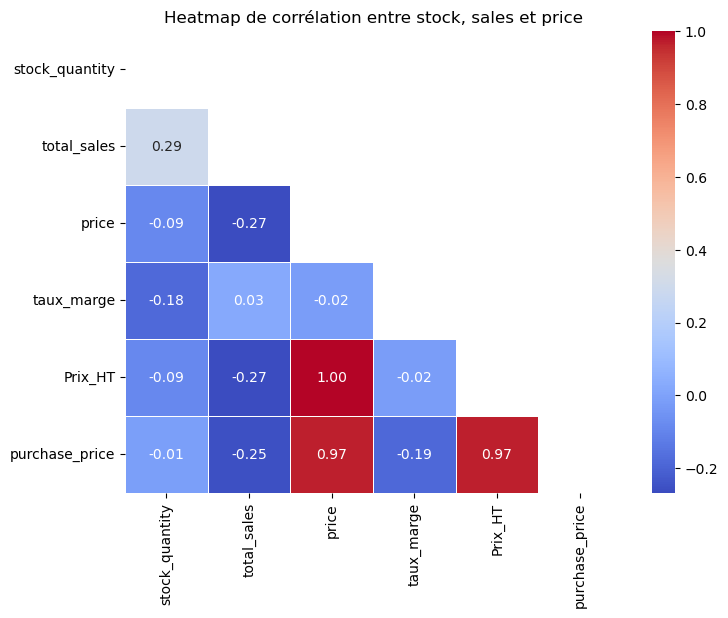

In [72]:
############################
# Analyse des correlations #
############################

#Importation de Seaborn
import seaborn as sns
#Création d'un heatmap de correlation avec les variables stock, sales et price
#on peut également créer un mask pour n'afficher qu'une demi heatmap
df_heat = df_merge[["stock_quantity","total_sales","price","taux_marge","Prix_HT","purchase_price"]]
correlation_matrix = df_heat.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap de corrélation entre stock, sales et price')
plt.show()


In [73]:
#Que peut-on conclure des correlations ?
#Relation fortes entre les différentes mesures de prix, logique car ces variables sont plus ou moins calculés à partir des mêmes données
#Les ventes totales tendent à diminuer à mesure que les prix augmentent
#Les taux de marge semblent avoir une relation négative avec les prix, prix plus élevés peuvent ne pas se traduire par des marges plus élevés ?
#La quantité de stock n'a pas vraiment de relation, sauf avec les ventes totales, plus de stock, plus de ventes ?

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [74]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.  
df_merge.to_excel("df_merge.xlsx", index=False)